In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
import pygraphviz as pgv

ModuleNotFoundError: No module named 'pygraphviz'

In [8]:
countrys = pd.read_csv('../../data/countries.csv', header=0)
cities = pd.read_csv('../../data/cities.csv', header=0)
combined = pd.concat([countrys, cities], ignore_index=True)

In [9]:
countrys

,Country,StartsWith,EndsWith
0,Afghanistan,a,n
1,Albania,a,a
2,Algeria,a,a
3,Andorra,a,a
4,Angola,a,a
...,...,...,...
190,Venezuela,v,a
191,Vietnam,v,m
192,Yemen,y,n
193,Zambia,z,a


In [11]:
countrys_network = nx.DiGraph()
cities_network = nx.DiGraph()
combined_network = nx.DiGraph()

In [12]:
for alphabet in 'abcdefghijklmnopqrstuvwxyz':
    countrys_end = countrys[countrys['EndsWith'] == alphabet]
    countrys_start = countrys[countrys['StartsWith'] == alphabet]
    
    for _, end_row in countrys_end.iterrows():
        for _, start_row in countrys_start.iterrows():
            if start_row['Country'] != end_row['Country']:
                countrys_network.add_edge(end_row['Country'], start_row['Country'])
    
    cities_end = cities[cities['EndsWith'] == alphabet]
    cities_start = cities[cities['StartsWith'] == alphabet]

    for _, end_row in cities_end.iterrows():
        for _, start_row in cities_start.iterrows():
            if start_row['City'] != end_row['City']:
                cities_network.add_edge(end_row['City'], start_row['City'])

    combined_end = combined[combined['EndsWith'] == alphabet]
    combined_start = combined[combined['StartsWith'] == alphabet]
    
    for _, end_row in combined_end.iterrows():
        for _, start_row in combined_start.iterrows():
            if start_row[combined.columns[0]] != end_row[combined.columns[0]]:
                combined_network.add_edge(end_row[combined.columns[0]], start_row[combined.columns[0]])

## Network Plots

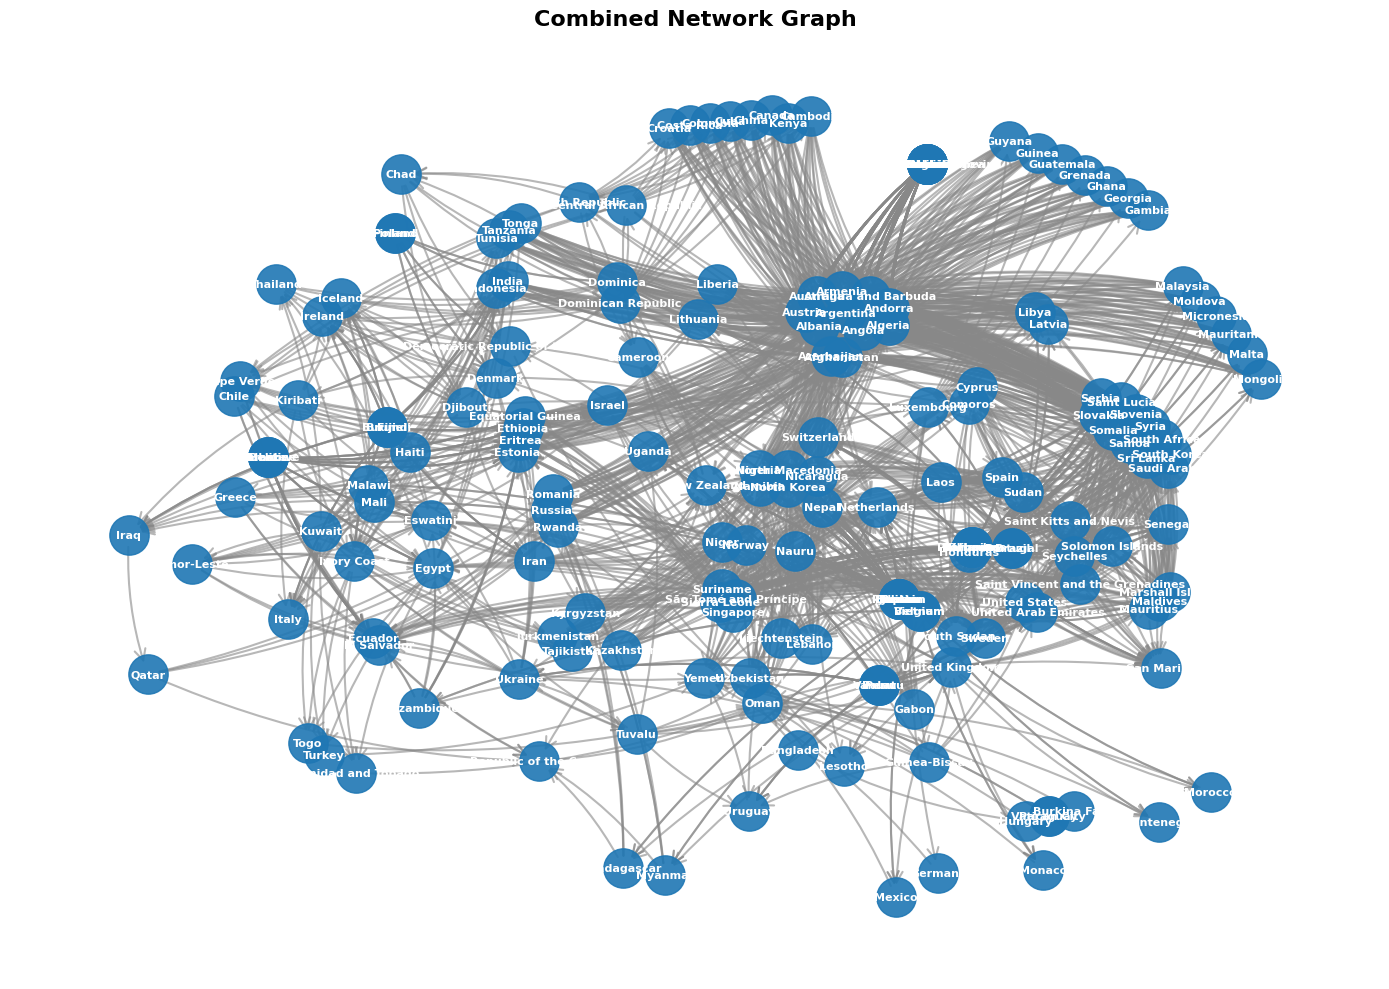

In [ ]:
# Create a figure with a larger size
plt.figure(figsize=(14, 10))

# Choose a layout algorithm
pos = nx.kamada_kawai_layout(countrys_network)

# Draw the network with customization
nx.draw_networkx_nodes(
    countrys_network,
    pos,
    node_color='#1f77b4',
    node_size=800,
    alpha=0.9
)

nx.draw_networkx_edges(
    countrys_network,
    pos,
    edge_color='#888888',
    arrows=True,
    arrowsize=20,
    arrowstyle='->',
    connectionstyle='arc3,rad=0.1',
    width=1.5,
    alpha=0.6
)

nx.draw_networkx_labels(
    countrys_network,
    pos,
    font_size=8,
    font_weight='bold',
    font_color='white'
)

plt.title('Countries Network Graph', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

In [17]:
# Create figure
plt.figure(figsize=(16, 12))

# Use graphviz_layout with 'dot' for hierarchical layout
pos = graphviz_layout(combined_network, prog='dot')

# Draw the network
nx.draw_networkx_nodes(
    combined_network,
    pos,
    node_color='#1f77b4',
    node_size=600,
    alpha=0.9
)

nx.draw_networkx_edges(
    combined_network,
    pos,
    edge_color='#888888',
    arrows=True,
    arrowsize=15,
    arrowstyle='->',
    width=1.2,
    alpha=0.6
)

nx.draw_networkx_labels(
    combined_network,
    pos,
    font_size=7,
    font_weight='bold',
    font_color='white'
)

plt.title('Combined Network - Hierarchical Layout', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

ImportError: requires pygraphviz http://pygraphviz.github.io/

<Figure size 1600x1200 with 0 Axes>